In [ ]:
import numpy as np
from scipy.fft import fft2,ifft2,fftfreq,fftshift,ifftshift
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image


In [3]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )


def Optica_G(U0,X,Y,lamb,L,z):
    A= 1
    for i in range(len(L)):
      A =  Optica(A*U0[i],X,Y,L[i],lamb)

    return Optica(A*U0[-1],X,Y,z,lamb)

In [2]:
def Optica(U0,X,Y,z,lamb):
    A = (fft2((U0)))
    Lx = np.max(X)
    Ly= np.max(Y)

    deltax = 2*Lx/len(U0)
    deltay = 2*Ly/len(U0)    


    fx = ( fftfreq(len(U0),deltax) )  
    fy = ( fftfreq(len(U0),deltay) )   
    
    #kx = ( fftfreq( len(X[0]), abs(X[0][0]-X[0][1])))
    #ky = ( fftfreq(len(Y[0]), abs(Y[1][0]-Y[0][0])))
    
    Fx,Fy = np.meshgrid(fx,fy)
    K = 2*np.pi/lamb

    # Handle cases where u is negative
    u = K**2-(2*np.pi*Fx)**2-(2*np.pi*Fy)**2
    sqrt_u = 1j*z*np.sqrt(abs(u))
    sqrt_u[np.where(u<0)] = 1j*sqrt_u[np.where(u<0)]

    return  ( ifft2( ( A*np.exp(sqrt_u) ) ) )
def mascs(caminho_img,N):
    # Abre a imagem em preto e branco
    img = Image.open(caminho_img).convert('L')

    #Redimensionar Imagem
    img_ = img.resize((N,N),Image.LANCZOS)

    # Converte a imagem para um array NumPy
    matriz = np.array(img_)

    # Converte a matriz, onde pixels pretos têm valor 0 e pixels brancos têm valor 1
    matriz_masc = (matriz != 0).astype(int)

    return matriz_masc

In [16]:
def Optica_G(U0,X,Y,lamb,L,z):
    A= 1
    for i in range(len(L)):
      A =  Optica(A*U0[i],X,Y,L[i],lamb)

    return Optica(A*U0[-1],X,Y,z,lamb)

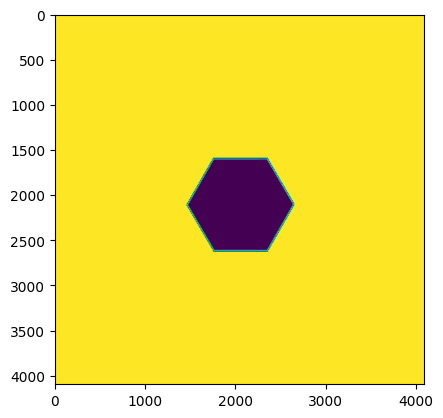

In [37]:
N = 4096
R,r = 8,3
x = np.linspace(-5*R,5*R,N,endpoint=False)
X,Y = np.meshgrid(x,x)


A1 = ((abs(X)>R)+(abs(Y)>R)).astype('float32')
A2 = mascs('Hexagon.png',N)
A3 = mascs('Triangulo.png',N)
A4 = mascs('22.png',N)
plt.imshow(A2)
plt.show()


In [40]:

z = 3500
lamb = 0.632*10**(-3)

U0 = Optica(A1,X,Y,z,lamb)
UH = Optica(A2,X,Y,z,lamb)
UE = Optica(A3,X,Y,z,lamb)
UHH = Optica(A4,X,Y,z,lamb)

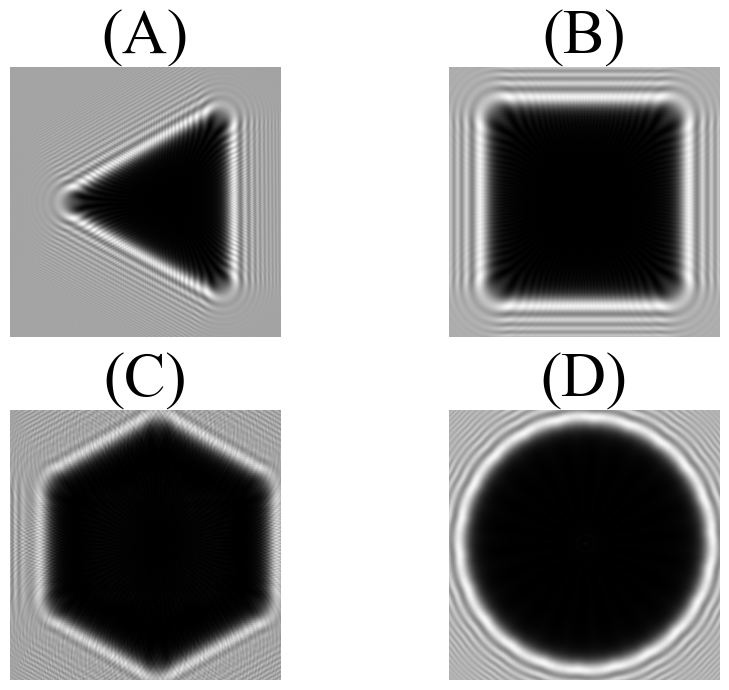

In [41]:
fig = plt.figure(figsize=(10,7))
gs = gridspec.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(abs(np.transpose(U0[np.where(abs(x)<1.5*R)[0]])[np.where(abs(x)<1.5*R)[0]])**2,cmap='gray')
ax1.axis('off')

ax1.set_title('(B)', fontname='Times New Roman',fontsize = 45)

ax2 = fig.add_subplot(gs[1,0])
ax2.imshow(abs(np.transpose(UH[np.where(abs(x)<1.6*R)[0]])[np.where(abs(x)<1.6*R)[0]])**2,cmap='gray')
ax2.axis('off')
ax2.set_title('(C)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(abs(np.transpose(UE[np.where(abs(x)<1.9*R)[0]])[np.where(abs(x)<1.9*R)[0]])**2,cmap='gray')
ax1.axis('off')

ax1.set_title('(A)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[1,1])
ax1.imshow(abs(np.transpose(UHH[np.where(abs(x)<1.6*R)[0]])[np.where(abs(x)<1.6*R)[0]])**2,cmap='gray')
ax1.axis('off')

ax1.set_title('(D)', fontname='Times New Roman',fontsize = 45)


plt.tight_layout()
plt.savefig('EXTRAS.png',dpi=300)

**With Slits**

In [2]:

def objeto(X,Y,Lx,Ly,n):
    A = []
    L = []
    AA = 1    
    i=180/n
    while i<181:
        phi = i*np.pi/180
        A.append(  ( (abs(np.cos(phi)*X + np.sin(phi)*Y) > Ly) + (abs(np.cos(phi)*Y - np.sin(phi)*X)> Lx)   ).astype('float32') )

        if i!=0:
            L.append(0.01)
        AA=A[-1]*AA
        i+=360/n
    return A,AA

In [7]:
N=4096
Lx,Ly = 8,0.5
R = Lx
# Step 1: Create a meshgrid
x = np.linspace(-9*R, 9*R, N,endpoint=False)  # Define axis range and resolution
X, Y = np.meshgrid(x, x)

#z = np.linspace(0,1800*R,300)
lamb = 0.632*10**(-3)


A3,AA3 = objeto(X,Y,Lx,Ly,4)
L = np.ones(len(A3)-1)
U3 = Optica_G( A3,X,Y,lamb, L,300)

A8,AA8 = objeto(X,Y,Lx,Ly,6)
L = np.ones(len(A3)-1)
U8 = Optica_G(A8,X,Y,lamb,L,300)

A16,AA16 = objeto(X,Y,Lx,Ly,14)
L = np.ones(len(A16)-1)
U16 = Optica_G(A16,X,Y,lamb,L,300)

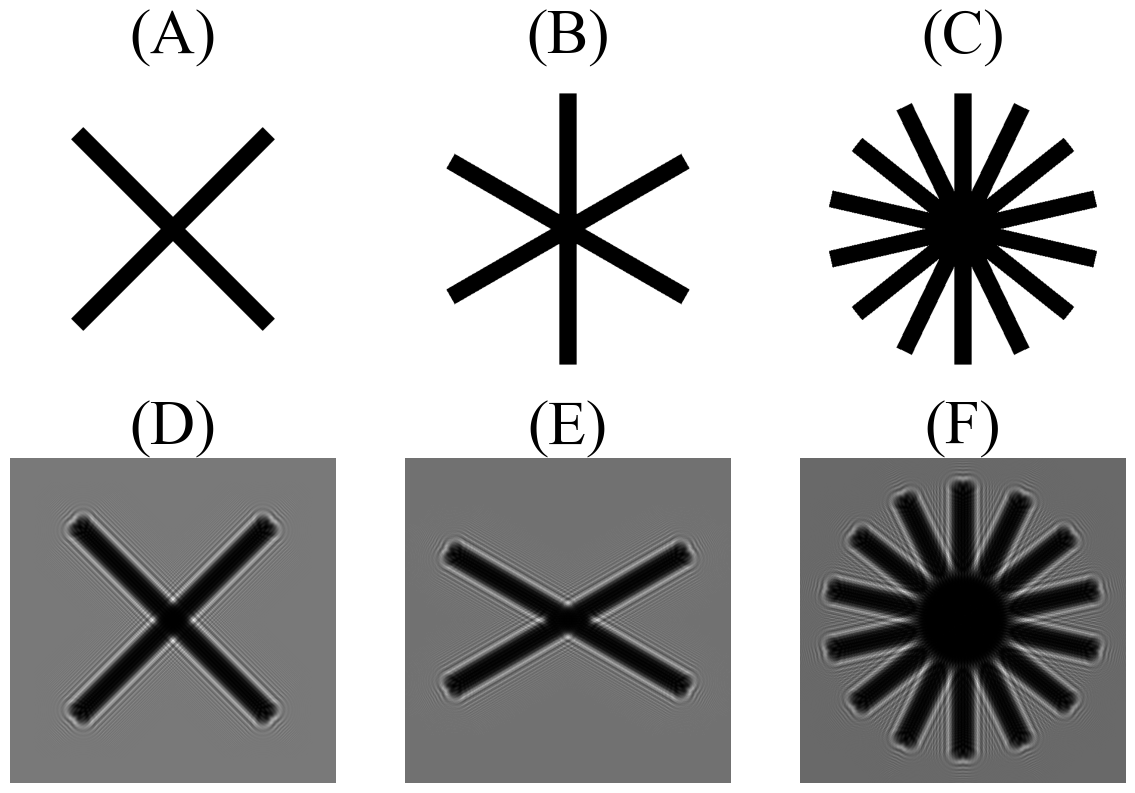

In [9]:
import matplotlib.gridspec as gridspec

b = 1.2
# Create the figure and grid specification
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2,3)  # Adjust `wspace` to control space between columns

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(np.transpose(AA3[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax0.axis('off')
ax0.set_title('(A)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow( np.transpose(AA8[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax1.axis('off')
ax1.set_title('(B)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[0, 2])
ax1.imshow( np.transpose(AA16[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax1.axis('off')
ax1.set_title('(C)', fontname='Times New Roman',fontsize = 45)

ax0 = fig.add_subplot(gs[1, 0])
ax0.imshow( (abs(np.transpose(U3[abs(x)<b*R])[abs(x)<b*R]))**2 ,cmap='gray')
ax0.axis('off')
ax0.set_title('(D)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[1, 1])
ax1.imshow( (abs(np.transpose(U8[abs(x)<b*R])[abs(x)<b*R]))**2,cmap='gray')
ax1.axis('off')
ax1.set_title('(E)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[1, 2])
ax1.imshow( (abs(np.transpose(U16[abs(x)<b*R])[abs(x)<b*R]))**2,cmap='gray')
ax1.axis('off')
ax1.set_title('(F)', fontname='Times New Roman',fontsize = 45)

plt.tight_layout()

#plt.savefig('Exemplos.svg',dpi=500)


In [16]:
N=4096
Lx,Ly = 8,0.1
R = Lx
# Step 1: Create a meshgrid
x = np.linspace(-3*R, 3*R, N,endpoint=False)  # Define axis range and resolution
X, Y = np.meshgrid(x, x)

#z = np.linspace(0,1800*R,300)
lamb = 0.632*10**(-3)


A3,AA3 = objeto(X,Y,Lx,Ly,4)
U3 = Optica( AA3,X,Y,1000,lamb )


A8,AA8 = objeto(X,Y,Lx,Ly,6)
U8 = Optica(AA8,X,Y,1000,lamb)

A16,AA16 = objeto(X,Y,Lx,Ly,22)
U16 = Optica(AA16,X,Y,1000,lamb)

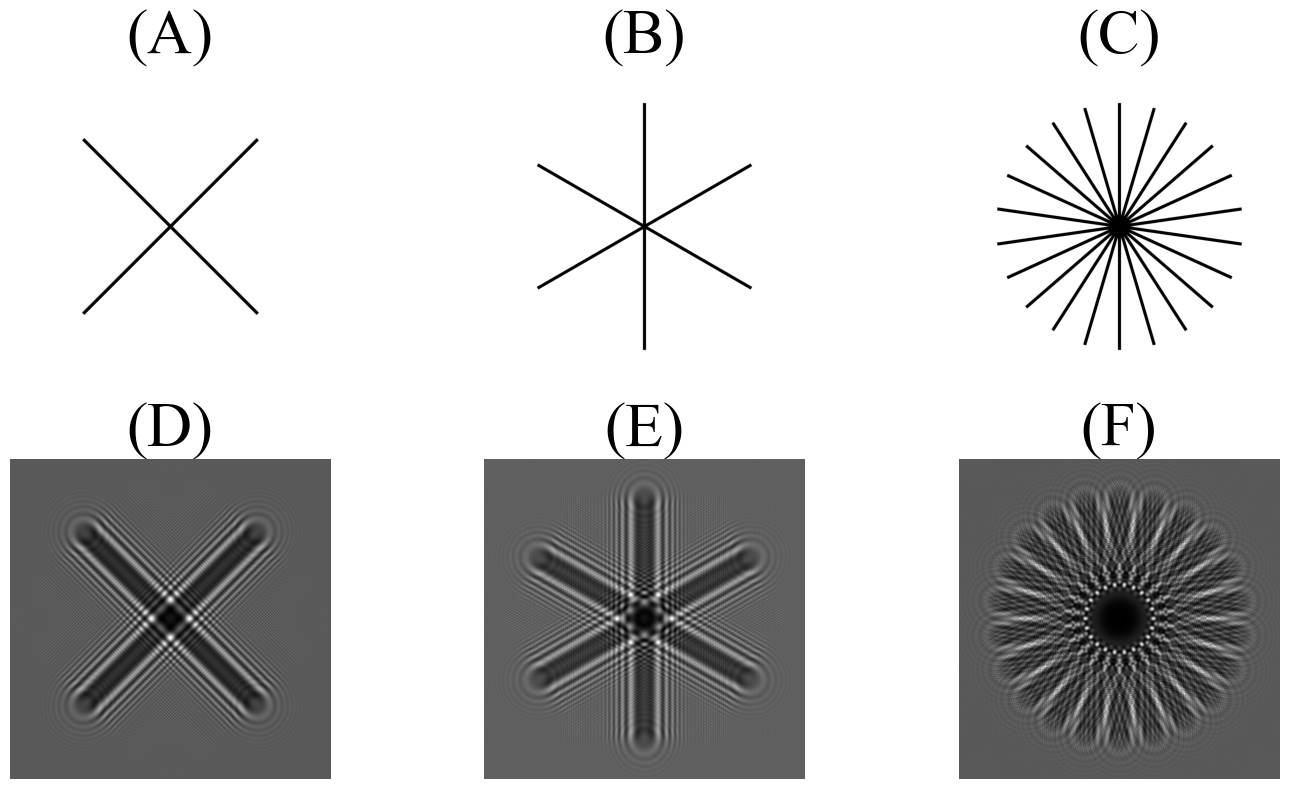

In [17]:
import matplotlib.gridspec as gridspec

b = 1.3
# Create the figure and grid specification
fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2,3)  # Adjust `wspace` to control space between columns

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(np.transpose(AA3[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax0.axis('off')
ax0.set_title('(A)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow( np.transpose(AA8[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax1.axis('off')
ax1.set_title('(B)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[0, 2])
ax1.imshow( np.transpose(AA16[abs(x)<b*R])[abs(x)<b*R],cmap='gray')
ax1.axis('off')
ax1.set_title('(C)', fontname='Times New Roman',fontsize = 45)

ax0 = fig.add_subplot(gs[1, 0])
ax0.imshow( (abs(np.transpose(U3[abs(x)<b*R])[abs(x)<b*R]))**2 ,cmap='gray')
ax0.axis('off')
ax0.set_title('(D)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[1, 1])
ax1.imshow( (abs(np.transpose(U8[abs(x)<b*R])[abs(x)<b*R]))**2,cmap='gray')
ax1.axis('off')
ax1.set_title('(E)', fontname='Times New Roman',fontsize = 45)

ax1 = fig.add_subplot(gs[1, 2])
ax1.imshow( (abs(np.transpose(U16[abs(x)<b*R])[abs(x)<b*R]))**2,cmap='gray')
ax1.axis('off')
ax1.set_title('(F)', fontname='Times New Roman',fontsize = 45)

plt.tight_layout()

plt.savefig('Exemplos.png',dpi=500)
